In [ ]:
import numpy as np
import os, glob

from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import TensorDataset

seed = 42
np.random.seed(seed)

verbose = True
subset = True
subset_fraction = 0.10

%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.insert(0, "../") # Temp

import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable

import src.models.tools

In [ ]:
dataDir = "../data/processed/"

# Params
batch_size = 64

# Load datasets
trainset = torch.load(dataDir + "train.pt")
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True)

validset = torch.load(dataDir + "valid.pt")
validloader = torch.utils.data.DataLoader(validset, batch_size, shuffle=True)

testset = torch.load(dataDir + "test.pt")
testloader = torch.utils.data.DataLoader(testset, batch_size, shuffle=True)

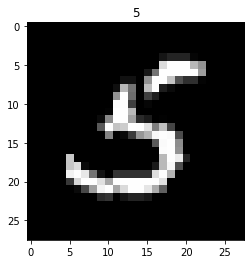

In [ ]:
import matplotlib.pyplot as plt
images, labels = next(iter(trainloader))
image, label = np.squeeze(images[0], 0), labels[0]

plt.imshow(image, cmap='gray')
plt.title('%i' % label)
plt.show()

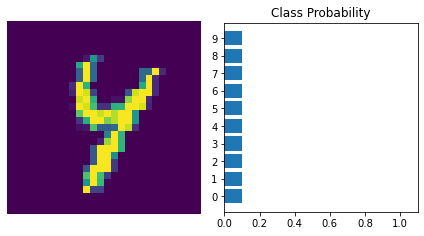

In [ ]:
# Test out your network!
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.tensor([0.10]*10)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
 
cnn = CNN()
print(cnn)

it = iter(trainloader)
X_batch, y_batch = next(it)
print(cnn.forward(X_batch).shape)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([64, 10])


In [ ]:
def fit(model):
    global epochs, criterion, optimizer

    model.train()

    loss_list = []
    accuracy_list = []

    for epoch in range(epochs):
        print(f"Epoch {epoch+1} / {epochs}")

        correct = 0
        running_loss = 0
        for i, (images, labels) in enumerate(trainloader):

            optimizer.zero_grad()
            output = model(images)

            loss = criterion(output, labels)

            loss.backward()
            optimizer.step()

            # Loss and accuracy
            running_loss += loss.item()
            ps = torch.exp(model(images))
            predicted = torch.max(output.data, 1)[1] 
            correct += (predicted == labels).sum()

        mean_loss = running_loss / len(trainset)
        mean_accuracy = (100 * correct / len(trainset)).item()
        print(f"Training Loss: {mean_loss:.6f}, Accuracy: {mean_accuracy:.2f}")

        # Stats
        loss_list.append(mean_loss)
        accuracy_list.append(mean_accuracy)

    return loss_list, accuracy_list

        # Evaluate
            # Total correct predictions
            #predicted = torch.max(output.data, 1)[1] 
            #correct += (predicted == labels).sum()

            #print(correct)
            #if i % 50 == 0:
            #    print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
            #        epoch, i*len(X_batch), len(trainloader.dataset), 100.*i / len(trainloader), loss.data[0], float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))
                

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())#,lr=0.001, betas=(0.9,0.999))

def test_model(model, trainloader, criterion, optimizer):
    dataiter = iter(trainloader)
    images, labels = next(dataiter)

    # Forward pass, get our logits
    logits = model(images)

    # Calculate the loss with the logits and the labels
    loss = criterion(logits, labels)
    print(loss)

In [ ]:
import src.models

In [ ]:
src.models.tools.test_model(model, trainloader, criterion, optimizer, v=False)

In [ ]:
model = CNN()

# Params
epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())#,lr=0.001, betas=(0.9,0.999))

# Test
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Forward pass, get our logits
logits = model(images)

# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)
print(loss)

tensor(2.2949, grad_fn=<NllLossBackward>)


In [ ]:
print("Saving model ...")
print("Model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
) 

The state dict keys: 

 odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'conv3.weight', 'conv3.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


In [ ]:
def save_checkpoint(model, filepath="models/checkpoint.pth"):
    checkpoint = {"model": model,
                  "state_dict": model.state_dict()}
    torch.save(checkpoint, filepath)

In [ ]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint["model"]
    model.load_state_dict(checkpoint["state_dict"])
    
    return model

In [ ]:
save_checkpoint(model, filepath="checkpoint.pth")

In [ ]:
model2 = load_checkpoint(filepath="checkpoint.pth")

In [ ]:
fit(model2)

Epoch 1 / 5
Training Loss: 0.002662, Accuracy: 94.69
Epoch 2 / 5
Training Loss: 0.002695, Accuracy: 94.89
Epoch 3 / 5
Training Loss: 0.002425, Accuracy: 95.40
Epoch 4 / 5


KeyboardInterrupt: 

In [ ]:
from src.visualization import visualize

visualize.plot_metric(loss_list, "Loss")
plt.tight_layout()
plt.savefig("test.pdf")

visualize.plot_metric(accuracy_list, "Accuracy")
plt.tight_layout()
plt.savefig("test2.pdf")